In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import xb.plotting as xp
import json
import os

In [3]:
path_unsegmented_datasets='../../../figures/2.comparison_between_datasets/input_for_segmentation/'
datasets=os.listdir(path_unsegmented_datasets)
datasets

FileNotFoundError: [Errno 2] No such file or directory: '../../../figures/2.comparison_between_datasets/input_for_segmentation/'

In [ ]:
ds='MERFISH_ABI'

In [ ]:
adata=sc.read(path_unsegmented_datasets+ds+'/adata.h5ad')

In [4]:
adata

NameError: name 'adata' is not defined

# We reed the SVG with coords

In [23]:
path_to_pols='../../../figures/2.comparison_between_datasets/polygons_original/'
os.listdir(path_to_pols)

['allen_merFISH.svg',
 'annotate_coordinates.Rmd',
 'annotate_coordinate_20221104.Rmd',
 'annotation_adjustment.csv',
 'annotation_adjustment.xlsx',
 'baristaseq.svg',
 'christoffer',
 'exseq.svg',
 'Hybriss.svg',
 'osmfish.svg',
 'smfish.svg',
 'SpatiaLabels_allen_merFISH.csv',
 'SpatiaLabels_baristaseq.csv',
 'SpatiaLabels_exseq.csv',
 'SpatiaLabels_Hybriss.csv',
 'SpatiaLabels_smfish.csv',
 'SpatiaLabels_starmap.csv',
 'SpatiaLabels_ST_FF.csv',
 'SpatiaLabels_ST_FFPE.csv',
 'SpatiaLabels_ST_FISH.csv',
 'SpatiaLabels_vizgen.csv',
 'SpatiaLabels_Xenium_rep1.csv',
 'SpatiaLabels_Xenium_rep2.csv',
 'SpatiaLabels_Xenium_rep3.csv',
 'SpatialPlotLabels_allen_merFISH.png',
 'SpatialPlotLabels_baristaseq.png',
 'SpatialPlotLabels_exseq.png',
 'SpatialPlotLabels_Hybriss.png',
 'SpatialPlotLabels_osmfish.png',
 'SpatialPlotLabels_starmap.png',
 'SpatialPlotLabels_ST_FF.png',
 'SpatialPlotLabels_ST_FFPE.png',
 'SpatialPlotLabels_ST_FISH.png',
 'SpatialPlotLabels_vizgen.png',
 'SpatialPlotLabels

In [24]:
path_to_pols='../../../figures/2.comparison_between_datasets/polygons_original/'
tag='SpatialPolygon_allen_merFISH.csv'
csv_file=path_to_pols+tag

In [25]:
output=pd.read_csv(path_to_pols+csv_file,index_col=0)

In [26]:
output.columns=['x', 'y','ID', 'region_annotation']

In [27]:
from shapely.geometry import Point, Polygon
def domainassign(plsin,adatadom):
    adatadom.obs['region_annotation']='None'
    plt.figure()
    for sel in plsin['region_annotation'].unique():
        plsub=plsin[plsin['region_annotation']==sel]
        if plsub.shape[0]>2:
    #        plt.figure()
            coord = np.array(plsub[['y','x']]).tolist()
            coord.append(coord[0])
            poli=Polygon(coord)
            xs, ys = zip(*coord) #create lists of x and y values
            plt.plot(xs,ys,color='black') 
            plt.title(sel)
            for n in adatadom.obs.index:
                pnt=Point(adatadom.obs.loc[n,'y_centroid'],adatadom.obs.loc[n,'x_centroid'])
                if pnt.within(poli)==True:
                    adatadom.obs.loc[n,'region_annotation']=sel
    plt.scatter(adatadom.obs['y_centroid'],adatadom.obs['x_centroid'],s=0.5)
    plt.show() # if you need...
    return adatadom

In [28]:
def domainassign_plot(plsin,adatadom):
    adatadom.obs['region_annotation']='None'
    plt.figure()
    for sel in plsin['region_annotation'].unique():
        print(sel)
        plsub=plsin[plsin['region_annotation']==sel]
        if plsub.shape[0]>2:
    #        plt.figure()
            coord = np.array(plsub[['y','x']]).tolist()
            coord.append(coord[0])
            poli=Polygon(coord)
            xs, ys = zip(*coord) #create lists of x and y values
            plt.plot(xs,ys,color='black') 
            plt.title(sel)
    plt.scatter(adatadom.obs['y_centroid'],adatadom.obs['x_centroid'],s=0.5)
    plt.show() # if you need...
    return adatadom

In [29]:
#dictio_region=dict(zip(output['region_annotation'],output['region_general']))

In [30]:
read_positions = pd.read_csv(path_unsegmented_datasets+ds+'/transcripts.csv',index_col=0)

In [31]:
adata=sc.read(path_unsegmented_datasets+ds+'/adata.h5ad')
adata.obs['y']=(adata.obs['x_centroid']/9.28)+read_positions['y'].min()
adata.obs['x']=(adata.obs['y_centroid']/9.28)+read_positions['x'].min()
adata.obs['y_centroid']=adata.obs['y']
adata.obs['x_centroid']=adata.obs['x']

In [32]:
read_positions['x']=(read_positions['x']-read_positions['x'].min())*9.28
read_positions['y']=(read_positions['y']-read_positions['y'].min())*9.28

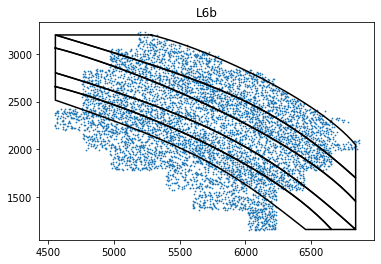

In [33]:
pls=output
#pls['x']=pls['x']/0.2125
#pls['y']=pls['y']/0.2125
adata_anno=domainassign(pls,adata)

In [34]:
adata_anno.obs['spatial annotation']=adata_anno.obs['region_annotation']

<AxesSubplot:xlabel='x_centroid', ylabel='y_centroid'>

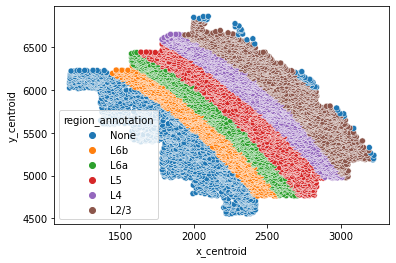

In [35]:
sns.scatterplot(x=adata_anno.obs['x_centroid'],y=adata_anno.obs['y_centroid'],hue=adata_anno.obs['region_annotation'])

In [1]:
adata_anno

NameError: name 'adata_anno' is not defined

In [36]:
adata_anno.write('../../../figures/2.comparison_between_datasets/with_regional_anno_segmented/anno_MERFISH.h5ad')